## 평가 (Evaluation)

## 분류의 성능 평가 지표 

 * 정확도 (Accuracy)
    
 * 오차행렬 (Confusion Matrix)

 * 정밀도 (Precision)
    
 * 재현율 (Recall)

 * F1 스코어
    
 * ROC AUC




# 1) 정확도 (Accuracy)

In [62]:
'''
# 정확도 : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표
           예측 결과와 동일한 데이터 건수
           
           정확도 =  --------------------------------------
           
                        전체 예측 데이터 건수
                        
            : 직관적으로 모델 예측 성능을 나타내는 지표
            : 주의 - 이거 하나만으로 성능을 평가하면 안됨 (왜곡이 발생할 수 있음)
    
    ex) 타이타닉 데이터에서 다른 조건 없이 성별 하나만 가지고 모델이 학습을 하면
    여성은 생존, 남성은 사망 이런 결과가 도출

'''

'\n# 정확도 : 실제 데이터에서 예측 데이터가 얼마나 같은지를 판단하는 지표\n           예측 결과와 동일한 데이터 건수\n           \n           정확도 =  --------------------------------------\n           \n                        전체 예측 데이터 건수\n                        \n            : 직관적으로 모델 예측 성능을 나타내는 지표\n            : 주의 - 이거 하나만으로 성능을 평가하면 안됨 (왜곡이 발생할 수 있음)\n    \n    ex) 타이타닉 데이터에서 다른 조건 없이 성별 하나만 가지고 모델이 학습을 하면\n    여성은 생존, 남성은 사망 이런 결과가 도출\n\n'

In [13]:
from sklearn.base import BaseEstimator
import numpy as np
import pandas as pd

class DummyClassifier(BaseEstimator):
    def fit(self, X, y=None): # 학습하지 않겠다
        pass
    
    def predict(self, X):
        pred = np.zeros((X.shape[0],1))
        for i in range(X.shape[0]):
            if X['Sex'].iloc[i]==1:
                pred[i] = 0
            else : 
                pred[i] = 1
            return pred          

In [14]:
# 내가 만든 알고리즘을 통해 타이타닉 생존자를 다시 구함
from sklearn.preprocessing import LabelEncoder

# null 처리 함수
def fillna(df):
    titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
    titanic_df['Cabin'].fillna('N', inplace=True)
    titanic_df['Embarked'].fillna('N', inplace=True)
    return df

# 머신러닝 알고리즘에게 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩
def encoding_features(df):
    df['Cabin'] = df['Cabin'].str[:1] 
    fetures = ['Cabin','Sex','Embarked']
    for feature in fetures:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# 최종 전처리 수행
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = encoding_features(df)
    return df

In [15]:
from sklearn.linear_model import LogisticRegression


# 원본 데이터 로드
titanic_df = pd.read_csv('data/titanic_train.csv')

# 레이블 데이터 셋
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

# 학습할 피터 데이터 셋 - 전체 전처리
X_titanic_df = transform_features(X_titanic_df)

# 학습 세트와 테스트 데이터 세트 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2,
                                                   random_state=11)

In [16]:
# 내가 만든 학습알고리즘 이용하여 학습/예측/평가 수행
my_clf = DummyClassifier()
my_clf.fit(X_train,y_train)

my_pred = my_clf.predict(X_test)
print('DummyClassifier accuracy : {0:4f}'.format(accuracy_score(y_test,my_pred)))

DummyClassifier accuracy : 0.664804


In [17]:
# MNIST 데이터세트
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

In [18]:
digits = load_digits()

digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [19]:
digits.data.shape

(1797, 64)

In [20]:
digits.target.shape

(1797,)

In [21]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [22]:
digits.target == 7 

array([False, False, False, ..., False, False, False])

In [23]:
# digits 번호가 7이면 True --> astype(int) : 1로변환, 나머지는 False : 0 
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=11)

In [24]:
# 불균형 레이블 데이터 분포도 확인
y_test.shape

(450,)

In [25]:
# 불균형 레이블과 0과 1 개수
pd.Series(y_test).value_counts()

0    405
1     45
dtype: int64

In [26]:
class FakeClassifier(BaseEstimator):
    def fit(self, X, y):
        pass
    
    # 입력값으로 들어오는 x 데이터셋 크기만큼 모두 0으로 만들어서 return
    def predict(self, X):
        return np.zeros((len(X),1), dtype=bool)

In [27]:
# FakeClassifier로 학습/ 예측/ 정확도 평가
fake_clf = FakeClassifier()
fake_clf.fit(X_train, y_train)
fake_pred = fake_clf.predict(X_test)

print('예측을 모두 0 으로 하고 있을 때 정확도 : {0:.4f}'.format(accuracy_score(y_test,fake_pred)))

# 불균형한 데이터일 경우 정확도 평가 지표의 맹점이 더 잘드러남

예측을 모두 0 으로 하고 있을 때 정확도 : 0.9000


##  2) 오차 행렬

In [78]:
from IPython.display import Image

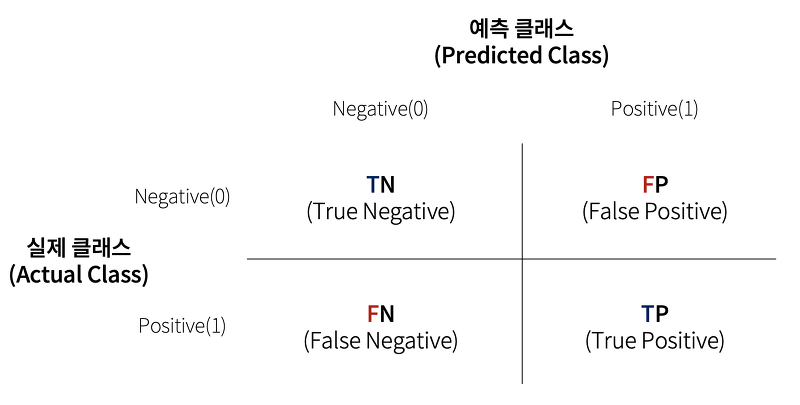

In [79]:
Image('data/confusion_matrix.png')

In [80]:
'''
# 오차 행렬(혼동 행렬)
: 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 (confusion) 있는지도 함께 보여주는 지표
: 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지도 함께 보여주는 지표

# 이 오차행렬을 이용하면 더 명확한 정확도 공식도 도출가능

# 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 
             
             (TN + TP) 
      ---------------------------
         (TN + FP + FN + TP )

'''

'\n# 오차 행렬(혼동 행렬)\n: 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 (confusion) 있는지도 함께 보여주는 지표\n: 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지도 함께 보여주는 지표\n\n# 이 오차행렬을 이용하면 더 명확한 정확도 공식도 도출가능\n\n# 정확도 = 예측 결과와 실제 값이 동일한 건수 / 전체 데이터 수 \n             \n             (TN + TP) \n      ---------------------------\n         (TN + FP + FN + TP )\n\n'

In [28]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, fake_pred)

array([[405,   0],
       [ 45,   0]], dtype=int64)

## 3) 정밀도와 재현율

In [82]:
'''
# 정밀도 = TP / (FP + TP)
# (양성 예측도)

# 재현율 = TP / (FN + TP)
# : 실제 양성 중 정확히 양성이라고 식별된 사례의 비율. 민감도(Sensitive), TPR(True Positive Rate)


===================================================================================
###################################################################################

# 정밀도와 재현율은 업무 특성에 따라 특정 평가 지표가 더 중요한 지표로 간주 될 수 있음에 유의!
- 재현율이 상대적으로 더 중요한 지표 : 실제 Positive 양성인 데이터 예측을 Negative로
잘못 판단하게 되면 업무 상 큰 영향이 발생하는 
ex(암 판단 모델, 금융 사기 적발 모델 )

정밀도가 상대적으로 더 중요한 지표 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생할 수 있음으로
ex) : 실제 Negative인 일반 메일을 Positive인 스펨메일로 분류 => 사용자가 메일 자체를 못받음

- 정리 
: 재현율과 정밀도 모두 TP를 높이는데 초점.
: 재현율은 FN을 낮추기, 정밀도는 FP를 낮추는데 초점
: 그러므로 이 두 평가지표는 서로 보완적
: 결국 가장 좋은 성능은 둘 모두 높은 수치를 얻는 것. 반면에 둘 중 하나만 지표가 높고 하나가 낮다면 바람직 하지 않음
'''

'\n# 정밀도 = TP / (FP + TP)\n# (양성 예측도)\n\n# 재현율 = TP / (FN + TP)\n# : 실제 양성 중 정확히 양성이라고 식별된 사례의 비율. 민감도(Sensitive), TPR(True Positive Rate)\n\n\n===================================================================================\n###################################################################################\n\n# 정밀도와 재현율은 업무 특성에 따라 특정 평가 지표가 더 중요한 지표로 간주 될 수 있음에 유의!\n- 재현율이 상대적으로 더 중요한 지표 : 실제 Positive 양성인 데이터 예측을 Negative로\n잘못 판단하게 되면 업무 상 큰 영향이 발생하는 \nex(암 판단 모델, 금융 사기 적발 모델 )\n\n정밀도가 상대적으로 더 중요한 지표 : 실제 Negative 음성인 데이터 예측을 Positive 양성으로 잘못 판단하게 되면 업무상 큰 영향이 발생할 수 있음으로\nex) : 실제 Negative인 일반 메일을 Positive인 스펨메일로 분류 => 사용자가 메일 자체를 못받음\n\n- 정리 \n: 재현율과 정밀도 모두 TP를 높이는데 초점.\n: 재현율은 FN을 낮추기, 정밀도는 FP를 낮추는데 초점\n: 그러므로 이 두 평가지표는 서로 보완적\n: 결국 가장 좋은 성능은 둘 모두 높은 수치를 얻는 것. 반면에 둘 중 하나만 지표가 높고 하나가 낮다면 바람직 하지 않음\n'

In [29]:
# FakeClassfier 예측 결과로 정밀도/재현율 측정
from sklearn.metrics import accuracy_score, precision_score, recall_score


print('정밀도 :', precision_score(y_test, fake_pred))
print('재현율 :', recall_score(y_test, fake_pred))

정밀도 : 0.0
재현율 : 0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
# 새로운 평가지표로 타이타닉 모델 재평가 - 로지스틱 회귀
from sklearn.linear_model import LogisticRegression

titanic_df = pd.read_csv('data/titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

In [31]:
# 오차행렬, 정밀도, 재현율 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    print(confusion)
    print('--------------------------------')
    print('정확도 :',accuracy)
    print('정밀도 :',precision)
    print('재현율 :',recall)
        
        
        ###정밀도 :{0:.4f}, 재현율:{0:.4f},'.format(accuracy, precision, recall))

In [32]:
lr_clf = LogisticRegression()

lr_clf.fit(X_train, y_train)

pred = lr_clf.predict(X_test)

get_clf_eval(y_test, pred)

[[401   4]
 [  2  43]]
--------------------------------
정확도 : 0.9866666666666667
정밀도 : 0.9148936170212766
재현율 : 0.9555555555555556


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 3-1) Precision/Recall Trade-off (정밀도/재현율 트레이드 오프)

In [ ]:
'''
# 분류하려는 업무 특성상 분류의 결정임계값(Threshold)을 조정해 정밀도 또는 재현율의 수치를 조정 가능
 그러나 정밀도와 재현율은 상호 보환적인 지표이므로 어느 한쪽을 높이면 다른 한쪽 수치는 떨어짐.
 그래서 정밀도 / 재현율의 트레이드 오프 라고함.

# 결정 임계값
: 보통 모델이 학습을 할 때 특정 값을 기준으로 이 기준값보다 확률이 크면 Positive, 낮으면 Negative라고 결정을 함
: 이 기준값이 결정임곅밧. 보통 이진 분류에서는 0.5가 보통


'''

In [33]:
# predict_proba() : 개별 데이터별로 예측 확률을 반환하는 메소드

pred_proba = lr_clf.predict_proba(X_test)

pred_proba.shape

(450, 2)

In [34]:
# 예측 결과값 위에서 3개만 추출
pred_proba[:3]

array([[9.99999978e-01, 2.21542445e-08],
       [9.78583321e-01, 2.14166788e-02],
       [9.99999789e-01, 2.10804907e-07]])

In [35]:
# 앞의 클래스가 선택되면 0, 뒤의 클래스가 선택되면 1로 표기
pred = lr_clf.predict(X_test)

print(pred_proba[:3],'-----------------', pred.reshape(-1,1)[:3])

[[9.99999978e-01 2.21542445e-08]
 [9.78583321e-01 2.14166788e-02]
 [9.99999789e-01 2.10804907e-07]] ----------------- [[0]
 [0]
 [0]]


In [36]:
# Binarizer : 사이킷런에서 제공하는 임계값을 조절할 수 있는 클래스 
from sklearn.preprocessing import Binarizer

X = [[1,-1,2],
    [2,0,0],
    [0, 1.1, .12]]


In [37]:
X

[[1, -1, 2], [2, 0, 0], [0, 1.1, 0.12]]

In [38]:
# threshold(결정 임계값) 보다 같거나 작으면 0 (negative), 크면 1(Positive)로 반환
binarizer = Binarizer(threshold=1.1)
binarizer.fit_transform(X)

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 0.]])

In [39]:
# 위 타이타닉 예제 결정임계값 0.5로 확인

# Positive 데이터 하나만 가지고 확인

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.5).fit(pred_proba_1)

custom_pred = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_pred)


[[401   4]
 [  2  43]]
--------------------------------
정확도 : 0.9866666666666667
정밀도 : 0.9148936170212766
재현율 : 0.9555555555555556


In [40]:
# 위 타이타닉 예제 결정임계값 0.4로 확인

# Positive 데이터 하나만 가지고 확인

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=0.4).fit(pred_proba_1)

custom_pred = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_pred)

[[400   5]
 [  2  43]]
--------------------------------
정확도 : 0.9844444444444445
정밀도 : 0.8958333333333334
재현율 : 0.9555555555555556


In [43]:
# precision_recall_curve() : 임계값에 따른 정밀도/재현율 값 추출
from sklearn.metrics import precision_recall_curve

In [49]:
# 레이블 값이 1일 때의 예측 확률을 추출
pred_proba_class_1 = lr_clf.predict_proba(X_test)[:,1]

# 실제 데이터 셋과 레이블 값이 1일 때의 예측 확률을 precision_recall_curve의 인자로 대입
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_1)

print('반환된 결정 임계값 shape', thresholds.shape)
print('반환된 precisions shape', precisions.shape)
print('반환된 recalls shape', recalls.shape)
                                                 

반환된 결정 임계값 shape (80,)
반환된 precisions shape (81,)
반환된 recalls shape (81,)


In [47]:
# 샘플로 10개만 추출 - 임계값 (15step)
thr_index = np.arange(0, thresholds.shape[0],15)
print('샘플 추출을 위한 임계값 배열의 index 10개 : ', thr_index)
print('샘플용 10개의 임계값 :' , np.round(thresholds[thr_index],2))

샘플 추출을 위한 임계값 배열의 index 10개 :  [ 0 15 30 45 60 75]
샘플용 10개의 임계값 : [0.   0.   0.09 1.   1.   1.  ]


In [51]:
# 15step 단위로 추출된 임계값에 따른 정밀도와 재현율
print('샘플 임계값별 정밀도 :', np.round(precisions[thr_index], 3))

print('샘플 임계값별 재현율 :', np.round(recalls[thr_index],3))



샘플 임계값별 정밀도 : [0.562 0.677 0.88  1.    1.    1.   ]
샘플 임계값별 재현율 : [1.    0.978 0.978 0.778 0.444 0.111]


In [53]:
# 정밀도-재현율 변화 곡선
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [55]:
def precision_recall_curve_plt(y_test, pred_proba_class_1):
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class_1)
    
    # X축을 threhold값, y축은 정밀도, 재현율 값
    plt.figure(figsize=(8,6))
    thresholds_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:thresholds_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds_boundary], label='recall')
    
    # x축 scale을 0.1 단위로 변경
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1), 2))
    
    # 각 축에 Label
    plt.xlabel('Treshold value')
    plt.ylabel('Precision & Recall value')
    plt.legend()
    plt.grid()
    plt.show()
    

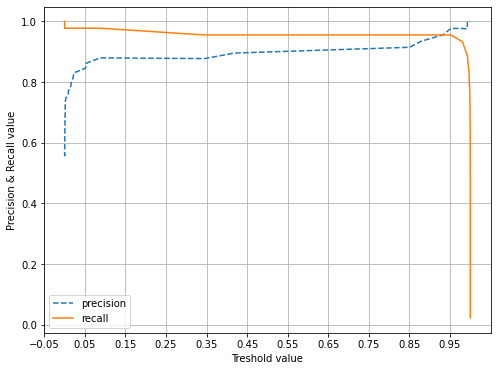

In [56]:
precision_recall_curve_plt(y_test, lr_clf.predict_proba(X_test)[:,1])

In [ ]:
'''
# 정리
: 임계값의 변경은 업무 환경에 맞게 두 개의 수치를 상호 보완할 수 있는 수준에서 적용해야 한다
  단순히 하나의 성능 지표 수치를 높이기 위한 수단으로 사용하면 안된다.
  
  : 최근에는 과적합을 없애는 방법으로도 많이 사용 중
'''

## 4) F1 Score

In [ ]:
'''
# F1 Score : 정밀도와 재현율을 결합한 지표
           : 정밀도와 재현율이 어느 한쪽으로 치우치지 않는 수치를 나타낼 때 상대적으로 높은 수치를 보임
           

'''

In [59]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test,pred)
np.round(f1,4)

0.9348

In [63]:
# 오차행렬, 정밀도, 재현율 함수, f1 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    
    print(confusion)
    print('--------------------------------')
    print('정확도 :',accuracy)
    print('정밀도 :',precision)
    print('재현율 :',recall)
    print('f1 score :', f1)
    print('=================================================')   
       

In [66]:
def get_eval_by_thresholds(y_test, pred_proba_class_1, thresholds):
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_class_1)
        custom_pred = binarizer.transform(pred_proba_class_1)
        print('임계값 :', custom_threshold)
        get_clf_eval(y_test, custom_pred)

In [67]:
# 임계값 변화에 따른 타이타닉 평가
thresholds = [0,40, 0.45, 0.50, 0.55, 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_thresholds(y_test,pred_proba[:,1].reshape(-1,1),thresholds)

임계값 : 0
[[  0 405]
 [  0  45]]
--------------------------------
정확도 : 0.1
정밀도 : 0.1
재현율 : 1.0
f1 score : 0.18181818181818182
임계값 : 40
[[405   0]
 [ 45   0]]
--------------------------------
정확도 : 0.9
정밀도 : 0.0
재현율 : 0.0
f1 score : 0.0
임계값 : 0.45
[[401   4]
 [  2  43]]
--------------------------------
정확도 : 0.9866666666666667
정밀도 : 0.9148936170212766
재현율 : 0.9555555555555556
f1 score : 0.9347826086956522
임계값 : 0.5
[[401   4]
 [  2  43]]
--------------------------------
정확도 : 0.9866666666666667
정밀도 : 0.9148936170212766
재현율 : 0.9555555555555556
f1 score : 0.9347826086956522
임계값 : 0.55
[[401   4]
 [  2  43]]
--------------------------------
정확도 : 0.9866666666666667
정밀도 : 0.9148936170212766
재현율 : 0.9555555555555556
f1 score : 0.9347826086956522
임계값 : 0.6
[[401   4]
 [  2  43]]
--------------------------------
정확도 : 0.9866666666666667
정밀도 : 0.9148936170212766
재현율 : 0.9555555555555556
f1 score : 0.9347826086956522


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 5) ROC Curve와 AUC

In [68]:
'''
# ROC (Receiver Operation Curve): 수신자 판단 곡선
                                : FPR (False Positive Rate)이 변할때 TPR(재현율, 민감도)이 어떻게 변하는지를 나타내는 곡선
                                
        - TPR에 대응하는 특성으로 TNR(True Negative)라 불리는 특이성(Specificity)이 있음
        
        - 민감도(TPR)은 실제값 Positive(양성)가 정확히 예측되어야 하는 수준을 나타냄
        (질병이 있는 사람은 질병이 있는 것으로 양성 판정)
        
        - 특이성(TNR)은 실제값 Negative(음성)가 정확히 예측되어야 하는 수준을 나타냄
        (질병이 없는 사람은 질병이 없는 것으로 음성 판정)
        
        # 공식 : FPR = FP / (FP+ FN) => 1 - TNR => 1 - 특이성
'''

'\n# ROC (Receiver Operation Curve): 수신자 판단 곡선\n'

In [90]:
from sklearn.metrics import roc_curve
import numpy as np

In [91]:
# FPR 변화에 따른 TPR 변화를 ROC 곡선으로 시각화
def roc_curve_plt(y_test, pred_proba_class_1):
    fprs, tprs, thresholds = roc_curve(y_test,pred_proba_class_1)
    
    plt.plot(fprs, tprs, label='ROC')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arrange(start, end, 0.1)))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR')
    plt.legend()
    plt.show()

AttributeError: module 'numpy' has no attribute 'arrange'

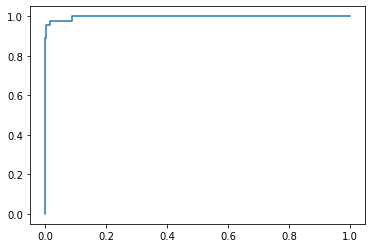

In [92]:
roc_curve_plt(y_test,lr_clf.predict_proba(X_test)[:, 1])

In [93]:
# 위 그래프는 변화값 파악에 보통 쓰이고, 성능 지표는 AUC 값으로 결정 - 보통 1에 가까울 수록 좋은 수치
from sklearn.metrics import roc_auc_score


pred_proba = lr_clf.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(y_test, pred_proba)
np.round(roc_score, 4)

0.9976

In [94]:
# 오차행렬, 정밀도, 재현율 함수, f1 함수, roc auc 함수
def get_clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test,pred_proba)
    
    print(confusion)
    print('--------------------------------')
    print('정확도 :',accuracy)
    print('정밀도 :',precision)
    print('재현율 :',recall)
    print('f1 score :', f1)
    print('roc auc:', roc_auc)
    print('=================================================')   
       

In [95]:
get_clf_eval(y_test, pred, pred_proba)

TypeError: get_clf_eval() takes 2 positional arguments but 3 were given